In [1]:
from lightkurve import TessLightCurve
from lightkurve.search import open 
from lightkurve.correctors import RegressionCorrector
import lightkurve as lk
import numpy as np

In [2]:
def findOrbitRadius(periodInDays, M):
    G = 6.67408 * (10 ** (-11))
    pi = 3.141592653589
    sunMassKG = 1.989 * (10**30)
    massKG = M * sunMassKG
    periodInSec = periodInDays * 24 * 3600
    return ((periodInSec * periodInSec*G*massKG)/4*pi*pi) ** (1. / 3)
def metersToAU(d):
    return d/(1.495978707*(10**11))

In [3]:
#pixels = open("TIC165602000/tess2019226182529-s0015-0000000165602000-0151-s_tp.fits")
#pixels.interact()
#lc.query_solar_system_objects()

In [105]:
lc1 = open("TIC 99646802/tess2018206045859-s0001-0000000099646802-0120-s_lc.fits").PDCSAP_FLUX
#lc2 = open("TIC 99646802/tess2020212050318-s0028-0000000099646802-0190-s_lc.fits").PDCSAP_FLUX
lc = lc1
#flatten_win_length = int(0.2 * len(lc.flux))
#print("win_length", flatten_win_length)
lc = lc.remove_outliers(sigma=50, sigma_upper=4).normalize().remove_nans()#.flatten(flatten_win_length)

TIC 99646802 : Folding on period  0.7155200000000556


<AxesSubplot:xlabel='Phase', ylabel='Normalized Flux'>

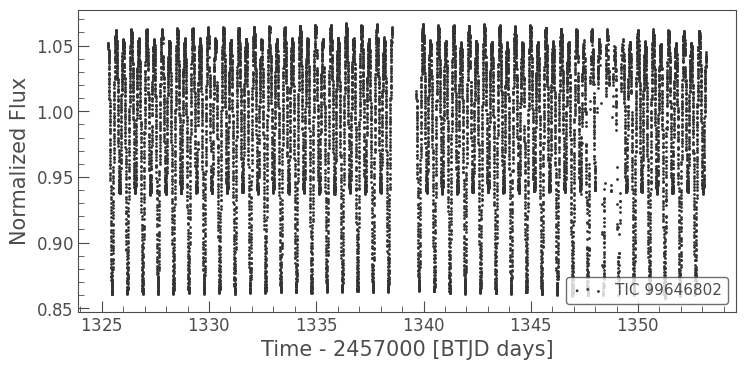

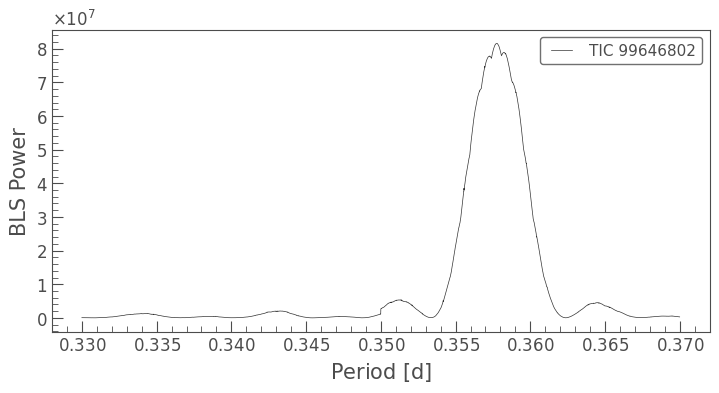

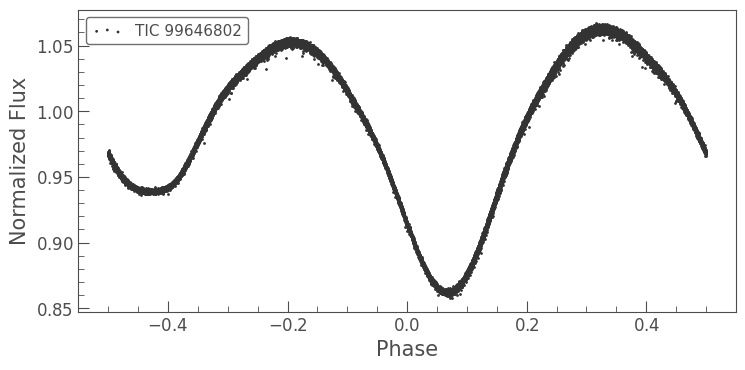

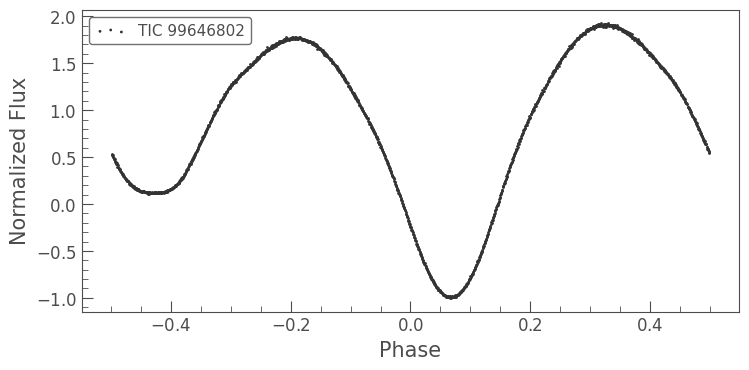

In [106]:
pg = lc.to_periodogram(method="bls", period=np.arange(0.33, 0.37, 0.00001))
lc_fold = lc.fold(period=2*pg.period_at_max_power, t0=1)
lc_global = lc_fold.bin(bins=1703, method='median') - 1
lc_global = (lc_global / np.abs(lc_global.flux.min()) ) * 2.0 + 1

lc.scatter()
pg.plot();
print(lc.label, ": Folding on period ",lc_fold.period)
lc_fold.scatter()
lc_global.scatter()